Research Question: What Makes an App Popular in Google Play? 

In [137]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib as plt
import matplotlib.pyplot as plt


In [138]:
#import the dataset 
googleplay = pd.read_csv("data/googleplaystore.csv")

In [139]:
#Check the dimentions of the dataset 
googleplay.shape

(10841, 13)

In [140]:
googleplay.info()
googleplay.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Data cleaning 

In [141]:
#check for the number of missing values in the dataset 
googleplay.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [142]:
googleplay_cleaned = googleplay.copy()

#delete row 10472, where 8 of 13 variables have wrong values
googleplay_cleaned = googleplay_cleaned.drop(10472, axis=0)

#subtitued the NaN value in Type with free since the price is 0 (
googleplay_cleaned[googleplay_cleaned.Type.isnull()]
googleplay_cleaned['Type'].fillna("Free", inplace = True)

#drop all na in rating 
googleplay_cleaned= googleplay_cleaned.dropna(subset=["Rating"])

#Since rating start from 1.0 to 5.0, subsititing NaN with 0 (making 0 as an indecator of unrated apps) 
#googleplay_cleaned['Rating'].fillna(0.0, inplace = True)

# convert Review, price, and Installs to numeric type   
googleplay_cleaned["Reviews"] = googleplay_cleaned["Reviews"].astype("int")

#clean the Installs Variable and convert to float 
googleplay_cleaned['Installs'] = googleplay_cleaned.Installs.str.replace("+","")
googleplay_cleaned['Installs'] = googleplay_cleaned.Installs.str.replace(",","") # because of this fucker '10,000'
googleplay_cleaned["Installs"]= googleplay_cleaned["Installs"].astype("int")

#clean PRice and convert to float 
googleplay_cleaned['Price'] = googleplay_cleaned.Price.str.replace("$","")
googleplay_cleaned["Price"] = googleplay_cleaned["Price"].astype("float64") 

# clean the size variable and convert to float  
googleplay_cleaned['Size'] = googleplay_cleaned.Size.str.replace("M","1e6")
googleplay_cleaned['Size'] = googleplay_cleaned.Size.str.replace("k","1e3")
googleplay_cleaned["Size"] = googleplay_cleaned.Size.str.replace("Varies with device","NaN")
googleplay_cleaned["Size"] = googleplay_cleaned["Size"].astype("float64")
googleplay_cleaned['Size'].fillna(googleplay_cleaned["Size"].mean(), inplace = True)

googleplay_cleaned.isnull().sum()



/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_21454/1869855069.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  googleplay_cleaned['Installs'] = googleplay_cleaned.Installs.str.replace("+","")
/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_21454/1869855069.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  googleplay_cleaned['Price'] = googleplay_cleaned.Price.str.replace("$","")


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

Data Analysis: 

In [143]:
googleplay_cleaned.groupby('Type')["Installs"].count().sort_values(ascending=True)

Type
Paid     647
Free    8719
Name: Installs, dtype: int64

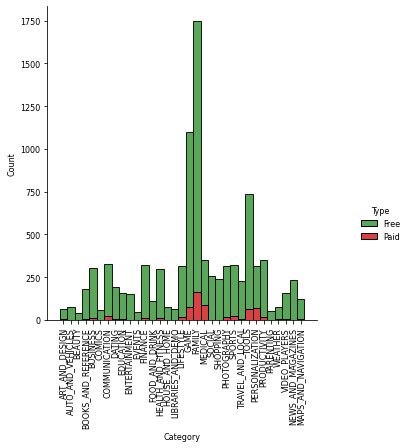

In [144]:
# Free vs Paid distribution based on cato 
sns.displot(
    data=googleplay_cleaned,
    x="Category", hue='Type',
    palette=["#228B22", "#D10000"], 
     multiple="stack"
)
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 8})

In [145]:
#divide dataset based Type (free or paid)
Paid_Apps =googleplay_cleaned[ googleplay_cleaned.Type == "Paid"]
Free_Apps =googleplay_cleaned[ googleplay_cleaned.Type == "Free"]
Paid_Apps.Installs.mean()
Free_Apps.Installs.mean()


19217171.161371715

On Averge Free apps are downloaded more than paid apps. 

In [146]:
Paid_Apps[(Paid_Apps.Price <= 19.99) & (Paid_Apps.Price >= 0.99)]["Category"].count()
# 615 out of 647 paid apps 

615

In [147]:
googleplay_cleaned[ googleplay_cleaned.Price > 19.99]["Category"].count()
#32 out of 647 paid apps 

32

/Users/AlaAlBinSaleh/Desktop/misk_DS/new_project/Data_Science_Portfolio/PyProtfolio/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Category'>

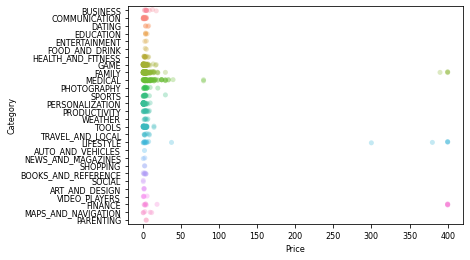

In [148]:
sns.stripplot(Paid_Apps.Price,Paid_Apps.Category, data=Paid_Apps, alpha=0.3)

The paid apps range from 0.99 to 400. 

The majority (94%) of the paid app falls between 0.99 and 19.99. while the remaining 6% falls beyond this range. 

Categories the fall whitin this rage are Family, Games, photography, communications, 
Catergories such as  LIFESTYLE, FINANCE ,MEDICAL have high prices reaching up to 400$


In [149]:
#find cato with the highest installation 
InstallsCat = googleplay_cleaned.groupby(['Category'])["Installs"].count().sort_values(ascending=True)

#find top 10 Cato
InstallsCat.tail(10)

Category
PERSONALIZATION     314
PHOTOGRAPHY         317
SPORTS              319
FINANCE             323
COMMUNICATION       328
MEDICAL             350
PRODUCTIVITY        351
TOOLS               734
GAME               1097
FAMILY             1747
Name: Installs, dtype: int64

In [150]:
#find the average rating, to set it as a threshold 
np.mean(googleplay_cleaned["Rating"])

4.191757420456972

In [151]:
#find cato with the highest installation 
RatingCat = googleplay_cleaned.groupby(['Category'])["Rating"].mean().sort_values(ascending=True)

#find top 5 Cato
RatingCat.tail(30)

Category
VIDEO_PLAYERS          4.063750
LIFESTYLE              4.094904
TRAVEL_AND_LOCAL       4.109292
BUSINESS               4.121452
ENTERTAINMENT          4.126174
FINANCE                4.131889
NEWS_AND_MAGAZINES     4.132189
COMICS                 4.155172
COMMUNICATION          4.158537
FOOD_AND_DRINK         4.166972
LIBRARIES_AND_DEMO     4.178462
MEDICAL                4.189143
AUTO_AND_VEHICLES      4.190411
PHOTOGRAPHY            4.192114
FAMILY                 4.192272
HOUSE_AND_HOME         4.197368
PRODUCTIVITY           4.211396
SPORTS                 4.223511
WEATHER                4.244000
SOCIAL                 4.255598
SHOPPING               4.259664
HEALTH_AND_FITNESS     4.277104
BEAUTY                 4.278571
GAME                   4.286326
PARENTING              4.300000
PERSONALIZATION        4.335987
BOOKS_AND_REFERENCE    4.346067
ART_AND_DESIGN         4.358065
EDUCATION              4.389032
EVENTS                 4.435556
Name: Rating, dtype: float64

The results above shows that more than half of the most intalled categories have a rating that is equal or greater than the average rating of 3.6. 

Therefore, apps the falls in categoriesthat are for everone scores higher in the rating and the number of installation. 

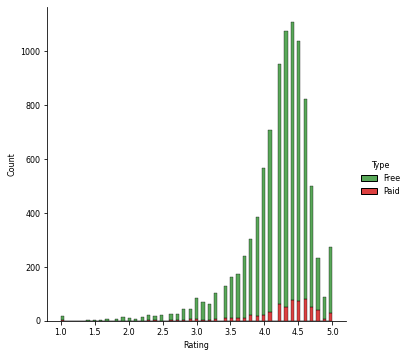

In [152]:
# Price vs rating plots 
sns.displot(
    data=googleplay_cleaned,
    x="Rating", hue='Type',
    palette=["#228B22", "#D10000"], 
     multiple="stack"
)

In [153]:
# What makes these categories have high rating and installation number
# check the intened audience for these cato
Categories= googleplay_cleaned[googleplay_cleaned.Category.isin(["FAMILY", "GAME", "TOOLS", "MEDICAL", "BUSINESS"])]
Categories.groupby("Content Rating")["App"].count()




Content Rating
Everyone        3263
Everyone 10+     264
Mature 17+       125
Teen             578
Unrated            1
Name: App, dtype: int64

Apps that are for "Everyone", Teen have the most count / Installistion 

<AxesSubplot:>

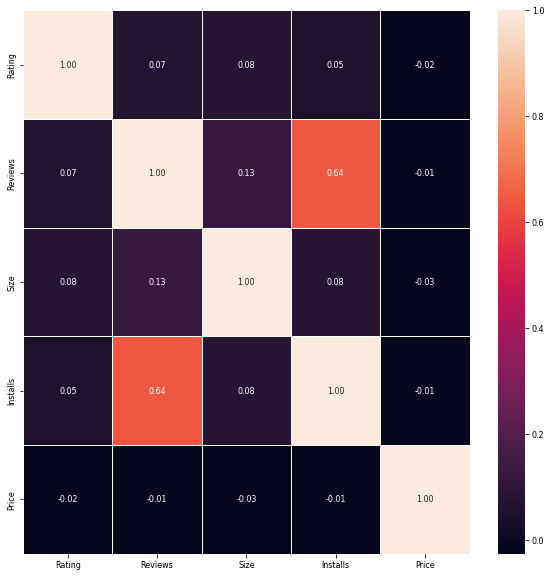

In [172]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(googleplay_cleaned.corr(), annot = True, linewidths = .5, fmt = ".2f", ax=ax)

Insight: 
- Free apps are the most populare. 
- Paid apps the falls within the range of 0.99 and 19.99 are most populare among paid apps 
- Apps that are falls in the these categories ("FAMILY", "GAME", "TOOLS", "MEDICAL", "BUSINESS" )are populare since their intended  audiance is  Everyone. 
- Apps that have large number views have a large number of installation.

Future work: 
Further analysis + App popularity prediction. 